# Genomic Wide Association Study: little example on human markers

The aim of this work is to find possible association among markers and phenotype, using a dataset based on human sample picked from more than one million individuals.
In this little project I am going to analyse to the phenotype ‘automobile speeding propensity’ (the tendency 
to drive faster than the speed limit) and its assosiation with molecular markers.

The analysis will be highlighting the markers with lowest p-value and therefore, the most significative in terms of association with risk-related phenotype; in this regard, I am going to transform p-values in their negative logarithm to make the plot more readable. The negative log of p-value will be in y-axis and the chromosome number in the x-axis.



The data was taken from the database (https://www.thessgac.org/data) related to the study: https://www.nature.com/articles/s41588-018-0309-3.

General information about this study: 

-population were sample-size-weighted from meta-analysis of ten smaller cohorts from seven studies.

-SNPs genotyping was performed by using a range of commercially available genotyping arrays; ~11,515,000 SNPS were 
analyzed.


In [1]:
import pandas as pd
import numpy as np
import os
os.chdir(r'/your/path/to/workingdirectory')

Dataset's description:

MarkerName (name of the snp), CHR (chromosome number), POS (base-pair position in the genome), A1 and A2 (effect allele and other allele), EAF_A1 (A1 frequency), Beta (standardize regression parameter), PVal(p-value)

In [2]:
gwas_df = pd.read_csv('AUTOMOBILE_SPEEDING_PROPENSITY_GWAS.txt', sep='\t')
gwas_df 

,MarkerName,CHR,POS,A1,A2,EAF_A1,Beta,SE,Pval
0,rs114608975,1,86028,T,C,0.908392,-0.00365,0.00370,0.32310
1,rs12238997,1,693731,A,G,0.877949,0.00420,0.00352,0.23300
2,rs4565649,1,713092,A,G,0.006237,-0.03358,0.02521,0.18280
3,rs149887893,1,714596,T,C,0.962227,0.01195,0.00637,0.06064
4,rs141090730,1,715205,C,G,0.993317,0.03074,0.02521,0.22300
...,...,...,...,...,...,...,...,...,...
11514458,rs9616985,22,51229805,T,C,0.923606,-0.00428,0.00433,0.32310
11514459,rs539541647,22,51231424,A,G,0.999399,-0.00469,0.03126,0.88080
11514460,NaN,22,51234033,T,C,0.000416,0.00947,0.03254,0.77140
11514461,rs3896457,22,51237063,T,C,0.714244,-0.00018,0.00246,0.94040


My analysis is just an exercise to understand the phenotype-genotype relation in the form of algorithm.

Given the hugeness of the dataset, I decided to randomly select 100000 SNPs in order to make my analysis lighter. 
The randomness was weighted on chromosome series.

In [5]:
gwas_df = gwas_df.sample(n=100000, weights='CHR')
gwas_df.head()

,MarkerName,CHR,POS,A1,A2,EAF_A1,Beta,SE,Pval
2425003,rs10512803,3,130957814,A,G,0.952448,0.00517,0.00646,0.42300
8913081,rs2104275,13,100576880,A,G,0.167770,-0.00422,0.00288,0.14260
11475974,rs139070,22,44553186,T,C,0.533908,-0.00105,0.00226,0.64210
11208393,rs186868754,21,16125311,T,C,0.000847,-0.04342,0.02657,0.10220
10572416,rs9962667,18,55018999,C,G,0.885109,-0.00624,0.00360,0.08296


In [6]:
gwas_df.shape

(100000, 9)

In [7]:
#negative log of pvalue
gwas_df['-logP']=-np.log(gwas_df['Pval'])
gwas_df.head()

,MarkerName,CHR,POS,A1,A2,EAF_A1,Beta,SE,Pval,-logP
2425003,rs10512803,3,130957814,A,G,0.952448,0.00517,0.00646,0.42300,0.860383
8913081,rs2104275,13,100576880,A,G,0.167770,-0.00422,0.00288,0.14260,1.947712
11475974,rs139070,22,44553186,T,C,0.533908,-0.00105,0.00226,0.64210,0.443011
11208393,rs186868754,21,16125311,T,C,0.000847,-0.04342,0.02657,0.10220,2.280824
10572416,rs9962667,18,55018999,C,G,0.885109,-0.00624,0.00360,0.08296,2.489397


Down below I added two series: 'cum_pos' e.g. cumulative position is referred to the 'coordinates' of SNPs within the genome, and 'SNP number' which is created to sort the SNPs

In [8]:
position = 0
comulative_pos= [] #create a list to define the comulative position of snps for each chromosome
for chrm, group  in gwas_df.groupby('CHR'):
    comulative_pos.append(group['POS'] + position)
    position += group['POS'].max() #position of snp for each chromosome

gwas_df['cum_pos'] = pd.concat(comulative_pos) #comulative position for each chromosome (new series)
gwas_df = gwas_df.sort_values(by=['CHR', 'cum_pos'], ascending=True) #sort values by number of chromosome and cumulative pos
gwas_df.reset_index(inplace=True)
gwas_df=gwas_df.drop(columns='index')
gwas_df['SNP_number']= gwas_df.index #create a new time series with the number of the snp

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Firsly, I plotted the sorted SNP numbers in the x-axis, to mark the difference with the subsequent analysis

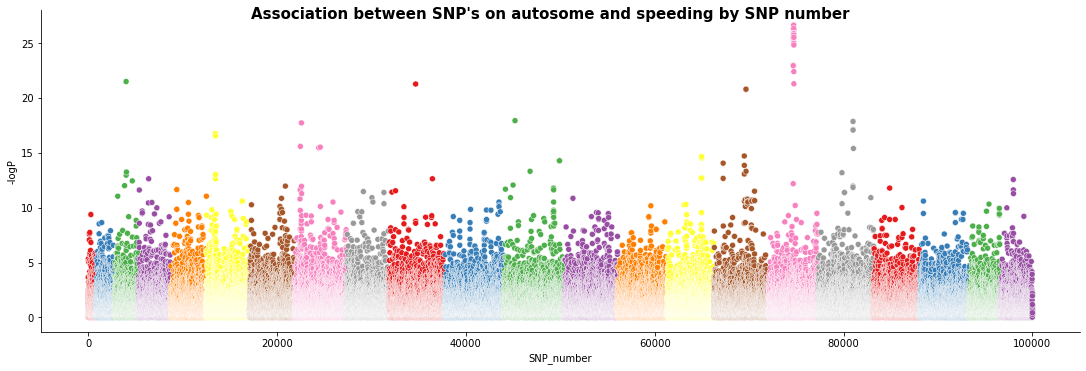

In [15]:
g = sns.relplot(data=gwas_df,
          x='SNP_number',
          y='-logP', 
          hue='CHR',
          palette='Set1',
          aspect=3,
          legend=None)
g.fig.suptitle("Association between SNP's on autosome and speeding by SNP number",fontsize=15, fontweight='bold')
plt.show()

Then, I plotted the sorted chromosome numbers in the x-axis to make the Manhattan plot with a GWAS style

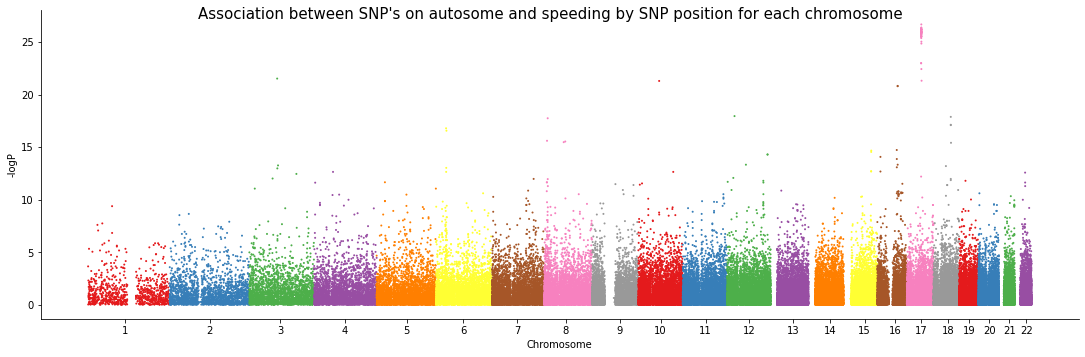

In [65]:
g = sns.relplot(
    data=gwas_df,
    x='cum_pos',
    y='-logP', 
    hue='CHR',
    palette='Set1',
    aspect=3,
    linewidth=0, #delete out lines
    s=4, #turn down the size
    legend=None
)
g.fig.suptitle("Association between SNP's on autosome and speeding by SNP position for each chromosome",fontsize=15)
g.ax.set_xlabel('Chromosome')
g.ax.set_xticks(gwas_df.groupby('CHR')['cum_pos'].median())#put labels in the median position
g.ax.set_xticklabels(gwas_df['CHR'].unique()) #numbering the chromosome
plt.show()

#gaps should be the centromere

Pandas apply function to change the colors

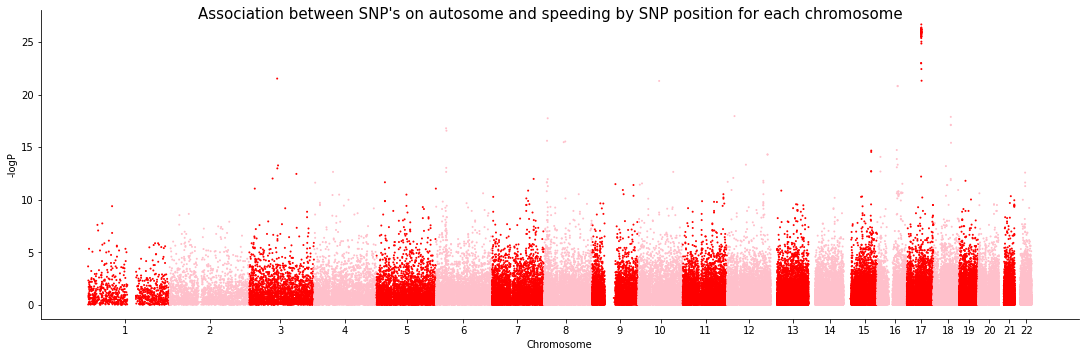

In [20]:
gwas_df['color_group'] = gwas_df['CHR'].apply(lambda x: 'A' if x % 2 == 0 else 'B') #define new CHR column with only two colors
g = sns.relplot(
    data=gwas_df,
    x='cum_pos',
    y='-logP', 
    hue='color_group', #change the hue
    palette= ['red', 'pink'], #change the colors
    aspect=3,
    linewidth=0, #delete out lines
    s=4, #turn down the size
    legend=None
)
g.fig.suptitle("Association between SNP's on autosome and speeding by SNP position for each chromosome",fontsize=15)
g.ax.set_xlabel('Chromosome')
g.ax.set_xticks(gwas_df.groupby('CHR')['cum_pos'].median())
g.ax.set_xticklabels(gwas_df['CHR'].unique())
plt.show()

Pandas.loc function to emphasize one particular chromosome

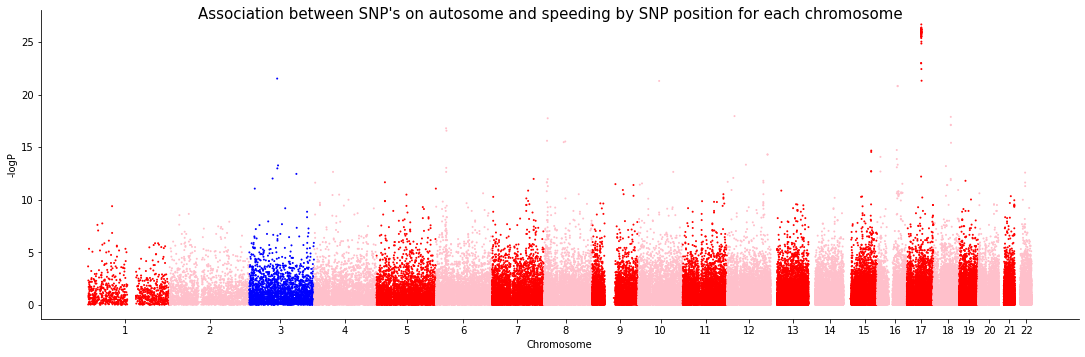

In [21]:
gwas_df.loc[gwas_df['CHR']== 3, 'color_group'] = 'C' # mark one particular chromosome

g = sns.relplot(
    data=gwas_df,
    x='cum_pos',
    y='-logP', 
    hue='color_group', #change the hue
    palette= ['red', 'pink', 'blue'], #mark chr 3
    aspect=3,
    linewidth=0, #delete out lines
    s=4, #turn down the size
    legend=None
)
g.fig.suptitle("Association between SNP's on autosome and speeding by SNP position for each chromosome",fontsize=15)
g.ax.set_xlabel('Chromosome')
g.ax.set_xticks(gwas_df.groupby('CHR')['cum_pos'].median())#put labels in the median position
g.ax.set_xticklabels(gwas_df['CHR'].unique())
plt.show()

Create a marker list, pass the list and plot. Yellow spot are the markers found in the list.
I made this example because we can use this function in the case of willing to mark particular SNPs of interest.

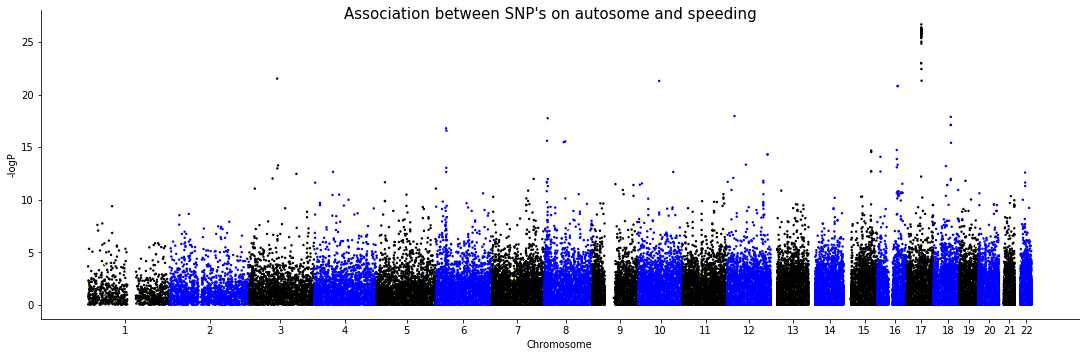

In [36]:
gwas_df['color_group'] = gwas_df['CHR'].apply(lambda x: 'A' if x % 2 == 0 else 'B')

# an other cool thing we can do is to randomly highlights some markers (imagining we have a marker's list of interest)
my_markers = gwas_df['MarkerName'].sample(100)
gwas_df.loc[gwas_df['MarkerName'].isin(my_markers), 'color_group'] = 'C' #pass the list of markers

g = sns.relplot(
    data=gwas_df,
    x='cum_pos',
    y='-logP', 
    hue='color_group', #change the hue
    palette= ['black', 'yellow', 'blue'], #mark chr 3 in yellow
    aspect=3,
    linewidth=0, #delete out lines
    s=6, #turn up the size
    legend=None
)
g.fig.suptitle("Association between SNP's on autosome and speeding",fontsize=15)
g.ax.set_xlabel('Chromosome')
g.ax.set_xticks(gwas_df.groupby('CHR')['cum_pos'].median())#put labels in the median position
g.ax.set_xticklabels(gwas_df['CHR'].unique())
plt.show()

Finally, I marked the most significant SNPs for evaluating the association with the risk-related behaviours (speed propensity).

The adjustText package provides tools to separate and indicate SNPs with the help of arrows.

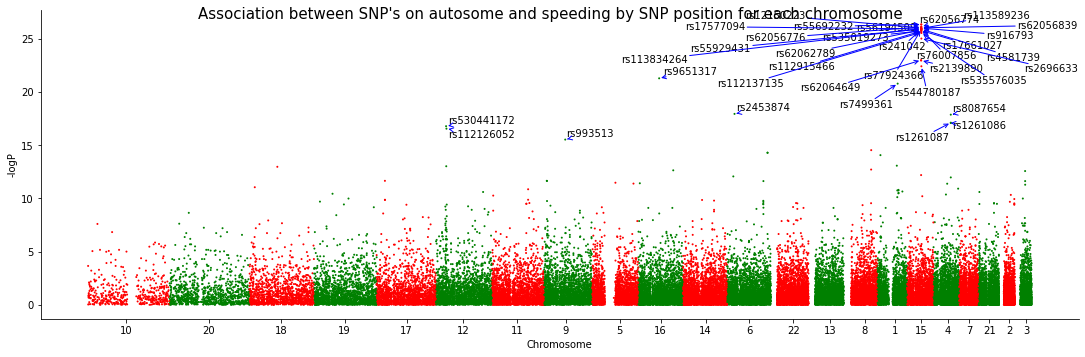

In [60]:
#import to separate labels (that don't allow us to read the name) where density of snp above 15 is higher
import adjustText
from adjustText import adjust_text

data = gwas_df.sample(50000) #taking a sample

g = sns.relplot(
    data=data,
    x='cum_pos',
    y='-logP', 
    hue='CHR', 
    palette= ['red', 'green']*11, 
    aspect=3,
    linewidth=0, 
    s=4, 
    legend=None
)
g.fig.suptitle("Association between SNP's on autosome and speeding by SNP position for each chromosome",fontsize=15)
g.ax.set_xlabel('Chromosome')
g.ax.set_xticks(data.groupby('CHR')['cum_pos'].median())
g.ax.set_xticklabels(data['CHR'].unique())


#annotate the markers with strongest association with phenotype, so those with -logPvalues high
data = data[data['-logP'] > 15]
ann = data[data['-logP'] > 15].apply(lambda p: g.ax.annotate(p['MarkerName'], (p['cum_pos'],p['-logP'])), axis=1).to_list()
adjust_text(ann, arrowprops={'arrowstyle': '->', 'color':'blue'})
plt.show()

This GWAS example wasn't set up to discover the precise genotype-phenotype association, neither to remark possible SNPs involved in the real life cases of risk behaviours. 
This notebook was made with the intention of showing how to perform GWAS with the most effective python data-working libraries!